In [95]:
import pandas as pd
import constants
import matplotlib.pyplot as plt

In [96]:
df_features = pd.read_csv(constants.FEATURES_PATH)
df_target_known = pd.read_csv(constants.TARGET_KNOWN_PATH)

In [97]:
df = pd.merge(df_features, df_target_known, on='id', how='outer')

In [98]:
df_known_income = df[df['income'].isna() == False]

In [99]:
df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
0,1,69,High School,Teacher,OK,Married,True,False,Rarely,31683.0
1,2,32,Bachelors,Engineer,VA,Single,False,False,Often,75308.0
2,3,89,Masters,Artist,MI,Married,True,False,Often,62238.0
3,4,78,Bachelors,Musician,IA,Married,True,False,Never,33615.0
4,5,38,Bachelors,Engineer,NY,Divorced,False,False,Often,98829.0
...,...,...,...,...,...,...,...,...,...,...
4999995,4999996,70,High School,Engineer,NY,Widowed,True,False,Rarely,NaN
4999996,4999997,91,Masters,Teacher,MI,Divorced,True,True,Often,NaN
4999997,4999998,21,High School,Mechanic,GA,Single,False,True,Rarely,NaN
4999998,4999999,58,Bachelors,Engineer,TX,Married,False,False,Often,NaN


# 1

In [104]:
_df = df[ df['state'] == 'TX']
_df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
19,20,93,Bachelors,Chef,TX,Divorced,True,False,Often,32938.0
28,29,79,Bachelors,Mechanic,TX,Married,True,True,Rarely,42996.0
32,33,68,Bachelors,Artist,TX,Divorced,True,True,Often,51932.0
39,40,90,Masters,Chef,TX,Married,False,False,Rarely,52984.0
43,44,77,PhD,Lawyer,TX,Married,True,True,Rarely,148894.0
...,...,...,...,...,...,...,...,...,...,...
4999968,4999969,26,High School,Nurse,TX,Single,False,False,Rarely,NaN
4999970,4999971,36,High School,Doctor,TX,Divorced,False,False,Often,NaN
4999976,4999977,20,PhD,Artist,TX,Single,False,False,Rarely,NaN
4999978,4999979,55,High School,Lawyer,TX,Widowed,False,False,Often,NaN


In [105]:
print (len(_df))

465369


# 2

In [106]:
_df = df[(df['occupation'] == 'Teacher') & (df['state'] == 'IL') & (df['age'] < 20) & (df['marital_status'] == 'Married')]
_df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
115078,115079,19,Masters,Teacher,IL,Married,False,False,Never,69717.0
295232,295233,19,Masters,Teacher,IL,Married,False,False,Rarely,72071.0
303121,303122,19,Masters,Teacher,IL,Married,True,False,Often,61725.0
332699,332700,18,Masters,Teacher,IL,Married,False,False,Never,67722.0
337817,337818,19,Masters,Teacher,IL,Married,False,False,Often,68215.0
...,...,...,...,...,...,...,...,...,...,...
4807067,4807068,19,High School,Teacher,IL,Married,False,False,Often,NaN
4835664,4835665,18,High School,Teacher,IL,Married,False,False,Often,NaN
4953008,4953009,19,Masters,Teacher,IL,Married,True,False,Often,NaN
4953208,4953209,18,Masters,Teacher,IL,Married,False,True,Rarely,NaN


In [107]:
print (len(_df))

82


# 3

In [96]:
texas = df_known_income[ df_known_income['state'] == 'TX' ]

engineer = texas[ texas['occupation'] == 'Engineer']['income'].mean()
lawyer = texas[ texas['occupation'] == 'Lawyer']['income'].mean()

print(engineer)
print(lawyer)
print()

print (round(abs(engineer - lawyer)))


87763.15625448115
94215.21439405909

6452


# 4

<Axes: xlabel='marital_status'>

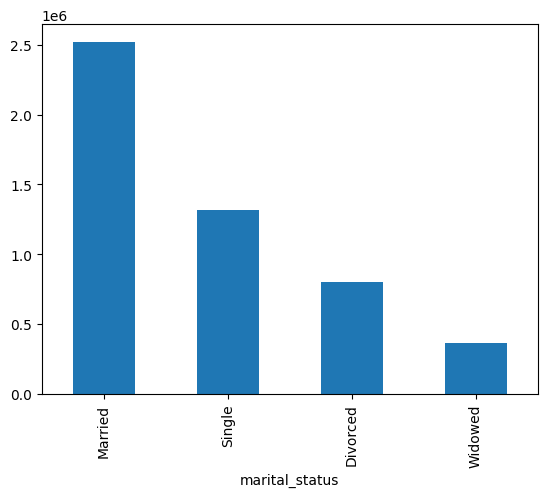

In [108]:
df['marital_status'].value_counts().plot(kind='bar')

In [112]:
df20s = df[ (df['age'] >= 20) & (df['age'] < 30)  ]
df20s_married = df20s[ (df20s['marital_status'] == 'Married') | (df20s['marital_status'] == 'Divorced') | (df20s['marital_status'] == 'Widowed')  ]

prop_20s_married = len(df20s_married) / len(df20s)
print(prop_20s_married)


df30s = df[ (df['age'] >= 30) & (df['age'] < 40)  ]
df30s_married = df30s[ (df30s['marital_status'] == 'Married') | (df30s['marital_status'] == 'Divorced') | (df30s['marital_status'] == 'Widowed')  ]

prop_30s_married = len(df30s_married) / len(df30s)
print(prop_30s_married)

diff = prop_30s_married - prop_20s_married
print(diff)
print ()
print (round(diff * 100))



0.2749537308643496
0.549691253724924
0.2747375228605744

27


# 5

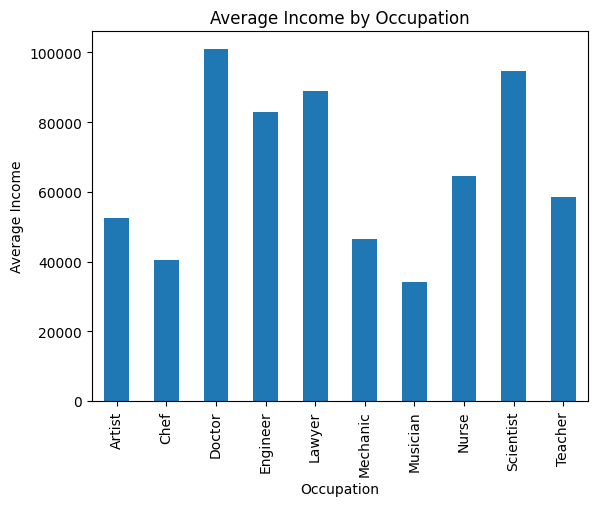

In [97]:
df_known_income.groupby('occupation')['income'].mean().plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.title('Average Income by Occupation')
plt.show()

# 6

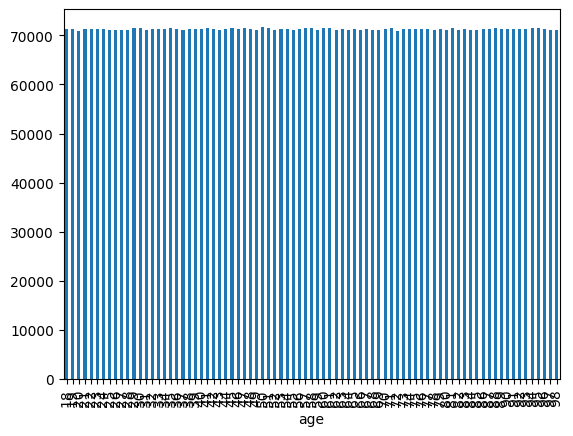

In [98]:
df_known_income.groupby('age')['income'].mean().plot(kind='bar')
plt.show()


# 7

<Axes: >

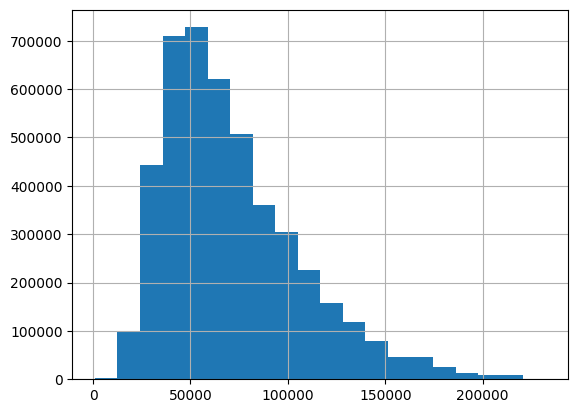

In [91]:
df_known_income['income'].hist(bins=20)

In [95]:
income_mean = df_known_income['income'].mean()
income_median = df_known_income['income'].median()

print (round(abs(income_mean - income_median)))

7573


### Predict unknown income values

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
# Prepare the data
features = ['education', 'occupation', 'state']
target = 'income'

# Convert categorical features to dummy variables
df_known_income_encoded = pd.get_dummies(df_known_income[features])
df_unknown_income_encoded = pd.get_dummies(df[df['income'].isna()][features])

In [37]:
# Align the columns of the unknown income data with the known income data
df_unknown_income_encoded = df_unknown_income_encoded.reindex(columns=df_known_income_encoded.columns, fill_value=0)


In [38]:
df_unknown_income_encoded

,education_Bachelors,education_High School,education_Masters,education_PhD,occupation_Artist,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Mechanic,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
4500000,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4500001,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4500002,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4500003,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4500004,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4999996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4999997,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4999998,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [39]:
# Split the data into training and testing sets
X = df_known_income_encoded
y = df_known_income[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=constants.RANDOM_SEED)


In [40]:
# Train a LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model score: {model.score(X_test, y_test)}")

Mean Squared Error: 123542374.2328916
Model score: 0.8987683378526775


In [42]:
# Predict the unknown income
y_unknown = model.predict(df_unknown_income_encoded)

In [64]:
df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
0,1,69,High School,Teacher,OK,Married,True,False,Rarely,31683.000000
1,2,32,Bachelors,Engineer,VA,Single,False,False,Often,75308.000000
2,3,89,Masters,Artist,MI,Married,True,False,Often,62238.000000
3,4,78,Bachelors,Musician,IA,Married,True,False,Never,33615.000000
4,5,38,Bachelors,Engineer,NY,Divorced,False,False,Often,98829.000000
...,...,...,...,...,...,...,...,...,...,...
4999995,4999996,70,High School,Engineer,NY,Widowed,True,False,Rarely,76112.934893
4999996,4999997,91,Masters,Teacher,MI,Divorced,True,True,Often,69970.885525
4999997,4999998,21,High School,Mechanic,GA,Single,False,True,Rarely,12463.972583
4999998,4999999,58,Bachelors,Engineer,TX,Married,False,False,Often,82455.978117


In [66]:
df_with_results = df.copy()
df_with_results.loc[df_with_results['income'].isna(), 'income'] = y_unknown

In [113]:
df_target_unknown = pd.read_csv(constants.TARGET_UNKNOWN_PATH)

# 8

In [114]:
_df = df_with_results.loc[df_with_results['id'] == 4795132]
_df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
4795131,4795132,53,Bachelors,Teacher,MI,Married,True,True,Never,47279.72174


In [122]:
# predicted
_pred = round(_df['income'].values[0]) 
print (_pred)

47280


In [123]:
# actual
_acutal = df_target_unknown.loc[df_target_unknown['id'] == 4795132]['income'].values[0]
print (_acutal)

50184


In [127]:
# percent difference
print (str(round(abs(_pred - _acutal) / _acutal * 100, 2)) + '%') 

5.79%


# 9

In [129]:
_df = df_with_results.loc[df_with_results['id'] == 4625316]
_df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
4625315,4625316,50,Bachelors,Doctor,KS,Married,False,False,Often,84194.493048


In [130]:
# predicted
_pred = round(_df['income'].values[0]) 
print (_pred)

84194


In [133]:
# actual
_acutal = df_target_unknown.loc[df_target_unknown['id'] == 4625316]['income'].values[0]
print (_acutal)

84173


In [134]:
# percent difference
print (str(round(abs(_pred - _acutal) / _acutal * 100, 2)) + '%') 

0.02%


# 10

In [135]:
_df = df_with_results.loc[df_with_results['id'] == 4956125]
_df

,id,age,education,occupation,state,marital_status,home_owner,pet_owner,travel_frequency,income
4956124,4956125,69,Masters,Engineer,PA,Single,True,True,Often,94233.214293


In [136]:
# predicted
_pred = round(_df['income'].values[0]) 
print (_pred)

94233


In [137]:
# actual
_acutal = df_target_unknown.loc[df_target_unknown['id'] == 4956125]['income'].values[0]
print (_acutal)

93912


In [138]:
# percent difference
print (str(round(abs(_pred - _acutal) / _acutal * 100, 2)) + '%') 

0.34%
